In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import arviz as az
import numpy as np

In [20]:
flows = pd.read_csv(r"..\..\UK-wood-mfa\build\flows.csv")
flows_obs= pd.read_csv(r'..\..\UK-wood-mfa\build\flows_obs.csv')
Observations = pd.read_excel(r"..\..\UK-wood-mfa\data\observations_with_references.xlsx")
flows_name = pd.read_excel(r'..\..\UK-wood-mfa\lists\flows_name.xlsx')
products_consumption = pd.read_excel(r'..\..\UK-wood-mfa\data_analysis\finished_products_consumption.xlsx')
products_consumption = products_consumption.set_index(['target'])



In [21]:
flows_name = list(flows_name.to_records())
flows_obs_list = list(flows_obs.to_records())

In [22]:
link = 'http://ukfires.org/analyses/UK-wood/system/'
Consumption = 'Consumption'

In [23]:
#UK consumption of finished products
link = 'http://ukfires.org/analyses/UK-wood/system/'
consumed_products = []
for flow in flows_name:
            consumption_flow_products = flows.loc[(flows['material'] == flow[3]) 
                                       & (flows['source'] == flow[1])
                                       & (flows['target'] == flow[2])]
            if ((('exports '+ link ) in flow[2])):
                
                                                            
                            consumption_flow_products = consumption_flow_products.set_index("target")
                           # consumption_flow_products=consumption_flow_products["value"].sum()
                            
                            
                          

                            consumed_products.append(consumption_flow_products)

                   

consumed_products = pd.concat(consumed_products)  
consumed_products = consumed_products.groupby(['sample']).sum()
consumed_products
#consumed_products = consumption_flow_products
#consumed_products= consumed_products.reset_index(level='target')
#consumed_products = consumed_products.groupby(['target','sample']).sum()
#consumed_products = consumed_products.reset_index(level='sample')
#consumed_products= consumed_products.reset_index(level='target')
#consumed_products.to_clipboard()
#consumed_products['value']=consumed_products['value'] / 1000000000
#consumed_products.to_clipboard()

C:\Users\rla44\AppData\Local\Temp\ipykernel_17480\687945926.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consumed_products = consumed_products.groupby(['sample']).sum()


,value,quantity
sample,,
0,1.010840e+10,1.008091e+10
1,1.006274e+10,1.005912e+10
2,1.029493e+10,1.026618e+10
3,9.991136e+09,9.978655e+09
4,1.049210e+10,1.042149e+10
...,...,...
9995,9.864090e+09,9.839409e+09
9996,1.069351e+10,1.067568e+10
9997,1.005261e+10,1.000355e+10


In [24]:
consumed_products['target']= 'exports'
consumed_products

,value,quantity,target
sample,,,
0,1.010840e+10,1.008091e+10,exports
1,1.006274e+10,1.005912e+10,exports
2,1.029493e+10,1.026618e+10,exports
3,9.991136e+09,9.978655e+09,exports
4,1.049210e+10,1.042149e+10,exports
...,...,...,...
9995,9.864090e+09,9.839409e+09,exports
9996,1.069351e+10,1.067568e+10,exports
9997,1.005261e+10,1.000355e+10,exports


In [25]:
Means = consumed_products.groupby('target')['value'].mean()
df= pd.DataFrame(Means)


In [26]:
consumed_products

,value,quantity,target
sample,,,
0,1.010840e+10,1.008091e+10,exports
1,1.006274e+10,1.005912e+10,exports
2,1.029493e+10,1.026618e+10,exports
3,9.991136e+09,9.978655e+09,exports
4,1.049210e+10,1.042149e+10,exports
...,...,...,...
9995,9.864090e+09,9.839409e+09,exports
9996,1.069351e+10,1.067568e+10,exports
9997,1.005261e+10,1.000355e+10,exports


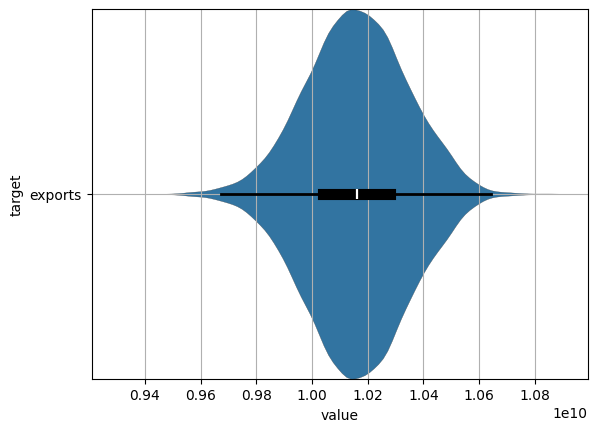

,Object,Uncertainty index,min,max,mean,median,diff_min,diff_max
0,exports,0.095137,9.674693e+09,1.064121e+10,1.015915e+10,1.015996e+10,4.844613e+08,-4.820524e+08


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

         

sns.violinplot(
    x="value",
    y="target",
    width=1,
   # hue= "target",
    data=consumed_products,
    linewidth=0.2,
   # hue="target",
    density_norm="width",
    orient="h",
    inner_kws=dict(box_width=8, whis_width=2, color="black"),
    inner="box",
    cut=0,
    zorder=1,
)

# Set the title of the plot
plt.title("")

# Calculate the difference ratio for each unique 'target'
difference_ratios = []  # List to store the ratios

# Group the data by 'target'
grouped = consumed_products.groupby("target")

for name, group in grouped:
    data = group["value"]
    k = 1.5

    # Calculate quartiles and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bounds for outlier detection
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Exclude outliers
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]

    # Calculate minimum and maximum within the non-outlier range
    min_non_outlier = np.min(filtered_data)
    max_non_outlier = np.max(filtered_data)
    
    mean_val = group["value"].mean()
    median_val = group["value"].median()
    Diff_min =  mean_val - min_non_outlier
    Diff_max =  mean_val - max_non_outlier

    difference_ratio = (max_non_outlier - min_non_outlier) / mean_val

    difference_ratios.append((name, difference_ratio,min_non_outlier,max_non_outlier, mean_val,median_val, Diff_min, Diff_max) )  # Store the target name and ratio
    
    
difference_ratios
plt.grid(True)

plt.show()

difference_ratio_df = pd.DataFrame(difference_ratios, columns=['Object', 'Uncertainty index', 'min', 'max', 'mean', 'median', 'diff_min', 'diff_max'])
difference_ratio_df

In [28]:
# Sort the DataFrame by the 'Value' column in descending order
df = difference_ratio_df .sort_values(by='Uncertainty index', ascending=False)
df= df.set_index('Object')


# Create a gradient color map for the 'Value' column
def gradient_color(val):
    max_val = df['Uncertainty index'].max()
    min_val = df['Uncertainty index'].min()
    normalized_value = (val - min_val) / (max_val - min_val)
    r = int(255 * (1 - normalized_value))
    return f'background-color: rgba(255, {r}, 2, 0.5)'


styled_df = df.style.applymap(lambda x: gradient_color(x), subset=['Uncertainty index'])

# Display the styled DataFrame

styled_df

C:\Users\rla44\AppData\Local\Temp\ipykernel_17480\1195321782.py:10: RuntimeWarning: invalid value encountered in scalar divide
  normalized_value = (val - min_val) / (max_val - min_val)


ValueError: cannot convert float NaN to integer

In [29]:
# Specify the file path along with the file name
file_path = r'C:/Users\rla44/OneDrive - University of Bath\MFA graphs/sankey_diagram_3102023'


# Save the plot with the specified file path
fig.savefig(file_path, format='pdf')

# Optionally, specify DPI for higher quality
# plt.savefig(file_path, format='pdf', dpi=300)

NameError: name 'fig' is not defined